In [49]:
###SASSIE WAVEGLIDER DATA USE AND VISUALIZATION##
import numpy as np
import xarray as xr
import glob 
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
import cartopy
import matplotlib
import os
import sys
import pandas as pd

#local directory where the TSG data is stored. Will eventually be replaced with direction to the published files on PODAAC. 
dir_in = '/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/L2/wavegliders_submitted/Final/'
    
#local directory where figures will be saved
fig_dir = '/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)


In [51]:
##LOAD IN THE NETCDF FILES AND LOOK AT THEIR METADATA  
files = sorted(glob.glob(dir_in + '/*.nc'))
for file in files:
    
    #SHOWS THE GLOBAL METEADATA AND WHICH VARIABLES ARE IN THE FILE
    ds = xr.open_dataset(file)
    #print(ds)
    
    #SHOW THE VARIABLE ATTRIBUTES FOR ANY GIVEN VARIABLE WITHIN THE FILE. Replace "salinity" with your variable of interest:
    variable_info = ds.air_pressure
    #print(variable_info)

In [52]:
def define_var_attributes(var):
    if var == 'surface_wave_period':
        colormap = 'cool'  
        var_label = 'Surface Wave Period (s)'
    if (var=='wind_speed'): 
        colormap = 'cividis'
        var_label = 'Wind Speed (m/s)'
    if (var=='wind_direction'):
        colormap = 'twilight'
        var_label = 'Wind Direction ($^{\circ}$N)'
    if (var =='air_temperature'):
        colormap = 'magma'
        var_label = 'Air Temperature ($^{\circ}$C)'
    if (var == 'air_pressure'):
        colormap = 'Blues'
        var_label= 'Air Pressure (hPa)'
    if var == 'surface_wave_direction':
        cmap = 'hsv'
        var_label = 'Surface Wave Direction ($^{\circ}$N)'
    if var=='surface_wave_height':
        colormap = 'autumn'
        var_label = 'Surface Wave Height (m)'
    if var =='salinity':
        colormap = 'viridis'
        var_label = 'Salinity'
    if var =='water_temperature':
        colormap = 'plasma'
        var_label = 'Water Temperature ($^{\circ}$C)'
    if var == 'time':
        colormap = 'jet'
        var_label = 'Date'
    return colormap,var_label

In [53]:
##USE THIS TO PLOT THE WAVE GLIDER TRACKS ON THE WHOLE CAMPAIGN MAP 
def map_wavegliders():
    
    #Grab Ship Track Data. Will eventually link to the published data on PODAAC. 
    ds_ship = xr.open_dataset('/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/L2/TSG_submitted/SASSIE_Fall_2022_Shipboard_TSG.nc')
    ship_time = np.squeeze(ds_ship['time'])
    ship_lat = np.squeeze(ds_ship['latitude'])
    ship_lon = np.squeeze(ds_ship['longitude'])
    
    ##CREATE A MAP WITH LAND AND CITY MARKERS AND SHIP TRACK  
    latmin = 70
    latmax =74
    lonmin=-157
    lonmax=-144
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection=cartopy.crs.NorthPolarStereo(central_longitude=-150))
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=cartopy.crs.PlateCarree())
    ax.coastlines(color='k')  
    ax.add_feature(cartopy.feature.LAND, facecolor = '0.50')
    ax.add_feature(cartopy.feature.RIVERS,facecolor='blue')

    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3) 
    ax.set_title('Waveglider Tracks',fontsize=22,pad=1) 
    gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(60,75,1))
    gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-170,-140,2))
    gl.top_labels = False
    gl.bottom_labels = True
    gl.right_labels = False
    
    if (latmin<71.2906) & (lonmin<-156.7886):
        utqiagvik = ax.scatter(-156.7886,71.2906,s=100,transform=cartopy.crs.PlateCarree(),c='red',marker = '*',label='Utqiagvik, AK',zorder=2)
    if (latmin<70.2002) & (lonmax>-148.4597):
        deadhorse = ax.scatter(-148.4597,70.2002,s=100,c='cyan',transform=cartopy.crs.PlateCarree(),marker = '*',label='Deadhorse, AK',zorder=2)
    plt.legend(loc=2)
    
    
    #Apply Ship Data 
    track = ax.plot(ship_lon, 
                 ship_lat,linewidth = 0.5,
                 c='black',
                   transform=cartopy.crs.PlateCarree(),label = 'Ship Track',zorder=1)
    plt.legend(loc=2)
    
    
    ##APPLY THE TIME AND LOCATION DATA IN EACH WAVEGLIDER FILE 
    files = sorted(glob.glob(dir_in + '/*.nc'))
    for file in files:
        ds_wg = xr.open_dataset(file)
        wg_time = np.squeeze(ds_wg['time'])
        wg_lat = np.squeeze(ds_wg['latitude'])
        wg_lon = np.squeeze(ds_wg['longitude']) 
        
        deployment_track = ax.scatter(wg_lon,wg_lat,s = 1,
                       c = wg_time,cmap = 'jet',
                       transform=cartopy.crs.PlateCarree(),zorder=2)
        
    
                        
    cbar = fig.colorbar(deployment_track, ax=ax, orientation="horizontal", pad=0.1)
    cbar.set_label(label='Date',size='large',weight='bold')
    cbar_tick_array=(np.linspace(min(wg_time.values).astype('int64'),max(wg_time.values).astype('int64'),5))
    cbar.set_ticks(cbar_tick_array)
    cbar.set_ticklabels(pd.to_datetime(cbar_tick_array).date)
        
    ##SAVE THE FIGURE 
    if not os.path.exists(fig_dir+'map'):
        os.makedirs(fig_dir+'map')
    
    print('Saving Output Image:  '+fig_dir+'map/waveglider_tracks_map.png')
    plt.savefig(fig_dir+'map/waveglider_tracks_map.png',dpi='figure',format='png')

Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/map/waveglider_tracks_map.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


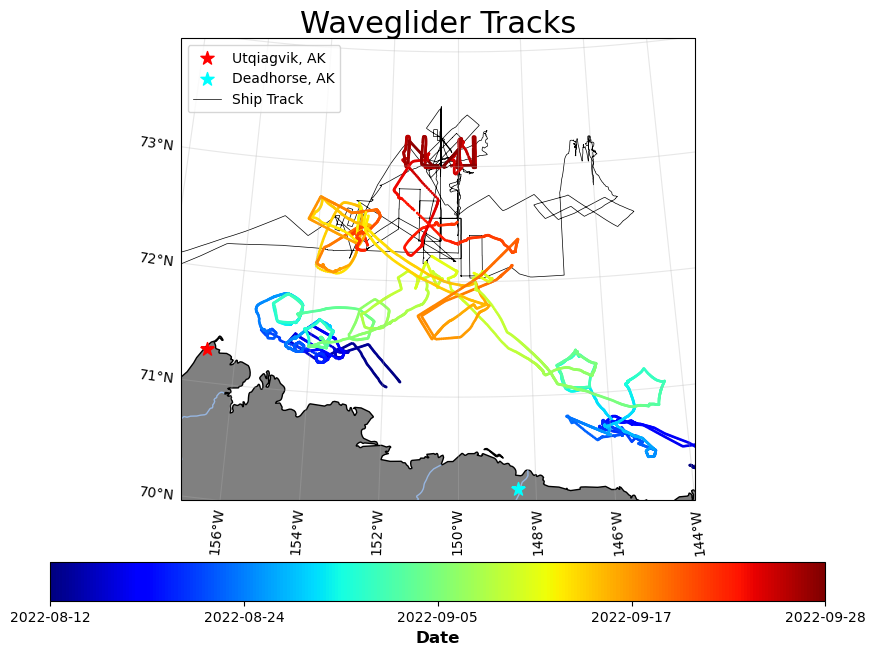

In [54]:
map_wavegliders()

In [59]:
##USE THIS TO MAP WAVEGLIDER VARIABLES 
def map_waveglider_variable(wg_number,var,var_min,var_max):
     
    #SHIPTRACK. Will eventually link to the published data on PODAAC. 
    ds_ship = xr.open_dataset('/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/L2/TSG_submitted/SASSIE_Fall_2022_Shipboard_TSG.nc')
    ship_time = np.squeeze(ds_ship['time'])
    ship_lat = np.squeeze(ds_ship['latitude'])
    ship_lon = np.squeeze(ds_ship['longitude'])
    
    ##WG DATA
    file = dir_in+'SASSIE_Fall_2022_Waveglider_'+str(wg_number)+'.nc'
    ds = xr.open_dataset(file,engine='netcdf4')
    wg_lat = ds['latitude']
    wg_lon = ds['longitude']
    wg_time = ds['time']
    wg_var = ds[var]
    
    ##CREATE A MAP WITH LAND AND CITY MARKERS  
    latmin = 70
    latmax =74
    lonmin=-158
    lonmax=-142
    
    colormap,var_label = define_var_attributes(var)
          
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection=cartopy.crs.NorthPolarStereo(central_longitude=-150))
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=cartopy.crs.PlateCarree())
    ax.coastlines(color='k')  
    ax.add_feature(cartopy.feature.LAND, facecolor = '0.50')
    ax.add_feature(cartopy.feature.RIVERS,facecolor='blue')
    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3) #draw_labels=True gives lat labels. 
    ax.set_title('Waveglider '+str(wg_number)+' '+var_label+' Readings',fontsize=15)
    xticks = list(np.linspace(lonmin,lonmax,4))
    yticks = list(np.linspace(latmin,latmax,3))
    gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(60,75,1))
    gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-170,-138,2))
    gl.top_labels = False
    gl.bottom_labels = True #change to tru to add lon labels
    gl.right_labels = False
    
    if (latmin<71.2906) & (lonmin<-156.7886):
        utqiagvik = ax.scatter(-156.7886,71.2906,s=100,transform=cartopy.crs.PlateCarree(),c='red',marker = '*',label='Utqiagvik, AK')
    if (latmin<70.2002) & (lonmax>-148.4597):
        deadhorse = ax.scatter(-148.4597,70.2002,s=100,c='cyan',transform=cartopy.crs.PlateCarree(),marker = '*',label='Deadhorse, AK')
  

    ##APPLY WAVEGLIDER DATA 
    wg_track = ax.scatter(wg_lon, 
                 wg_lat,s=5, 
                 c=wg_var,cmap=colormap,
                   transform=cartopy.crs.PlateCarree(),
                      vmin = var_min,
                      vmax = var_max,zorder = 2)
    
    plt.legend(loc=2)           
    matplotlib.pyplot.colorbar(wg_track, ax=ax, orientation="horizontal", pad=0.1).set_label(label=var_label,size='large',weight='bold')
    
    
    ##SHIP TRACK 
    #ship_track = ax.scatter(ship_lon,ship_lat,s = 1,c='black',transform=cartopy.crs.PlateCarree(),alpha = 0.002,zorder = 1)
    
    
    #SAVE FIGURE 
    if not os.path.exists(fig_dir+ var):
        os.makedirs(fig_dir+var)
    print('Saving Output Image:  '+fig_dir+var+'/Waveglider'+str(wg_number)+'.png')
    plt.savefig(fig_dir+var+'/Waveglider'+str(wg_number)+var+'.png',dpi='figure',format='png')
    
    
    

Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/salinity/Waveglider130.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/salinity/Waveglider153.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/salinity/Waveglider245.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/salinity/Waveglider247.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


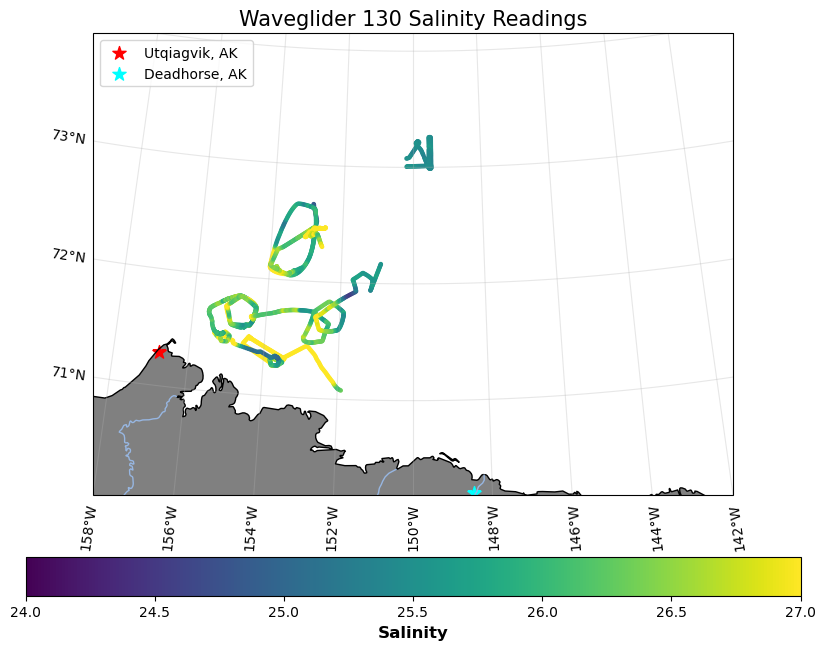

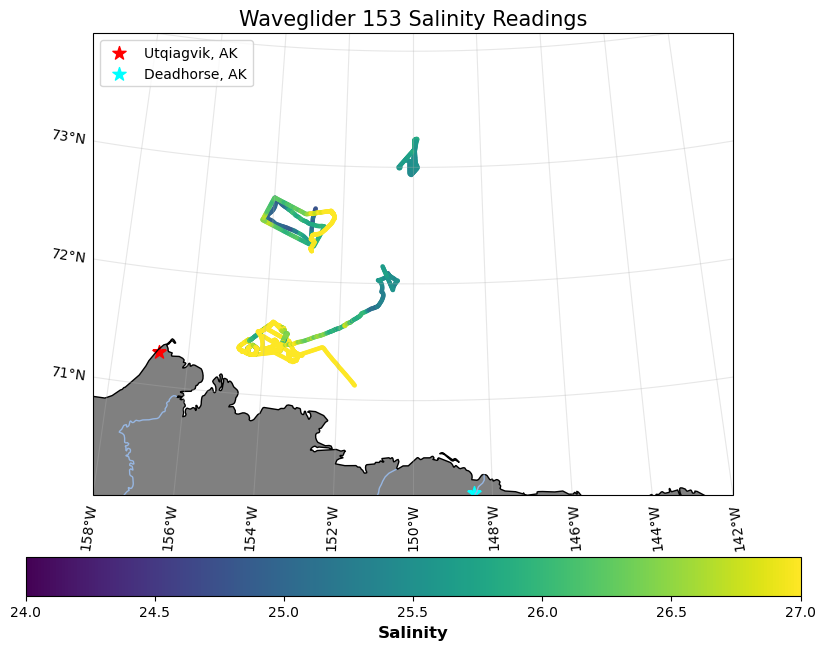

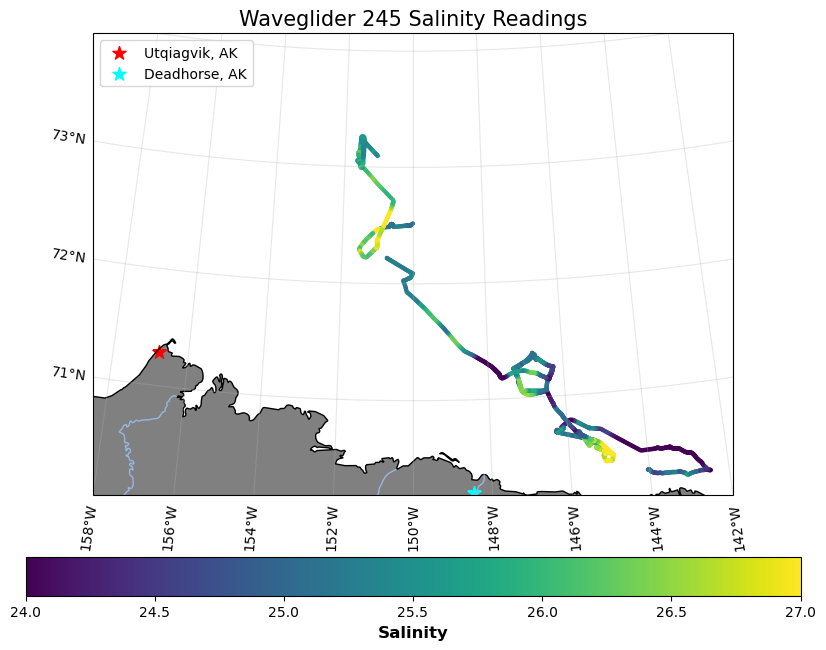

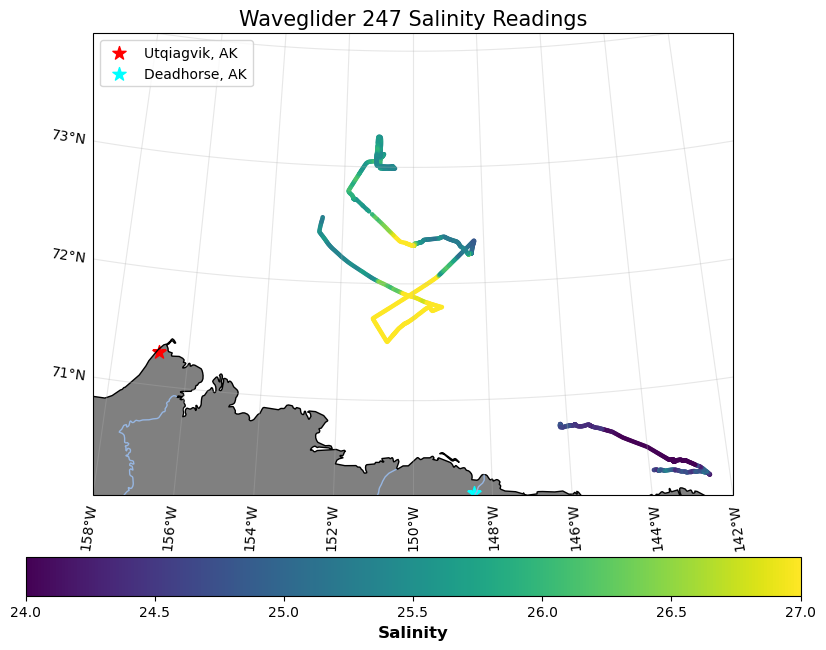

In [60]:
map_waveglider_variable(130,'salinity',24,27)
map_waveglider_variable(153,'salinity',24,27)
map_waveglider_variable(245,'salinity',24,27)
map_waveglider_variable(247,'salinity',24,27)

Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/water_temperature/Waveglider130.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/water_temperature/Waveglider153.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/water_temperature/Waveglider245.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/water_temperature/Waveglider247.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


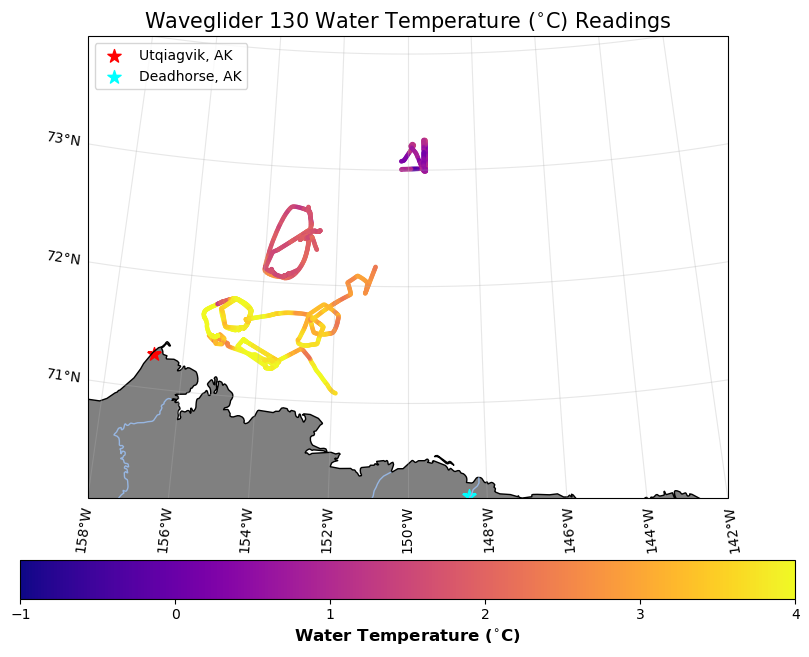

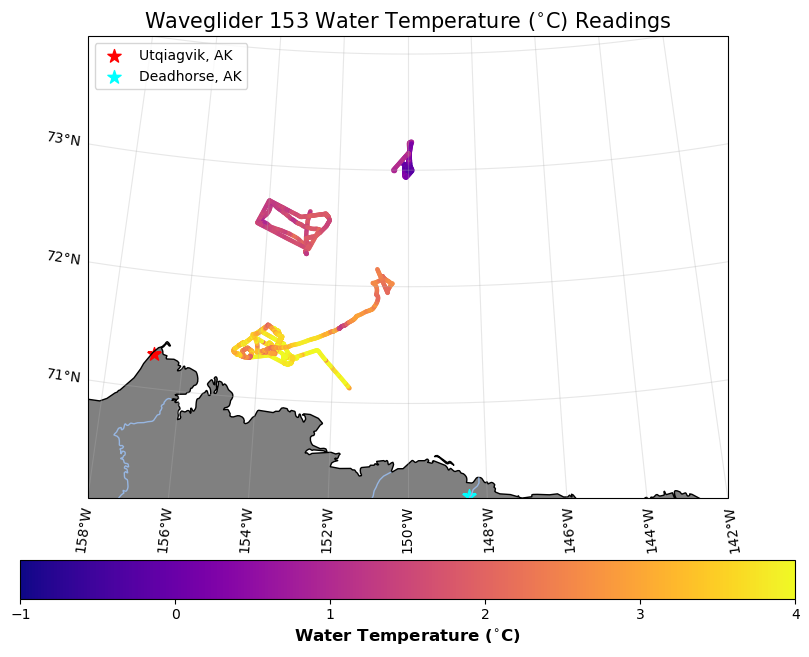

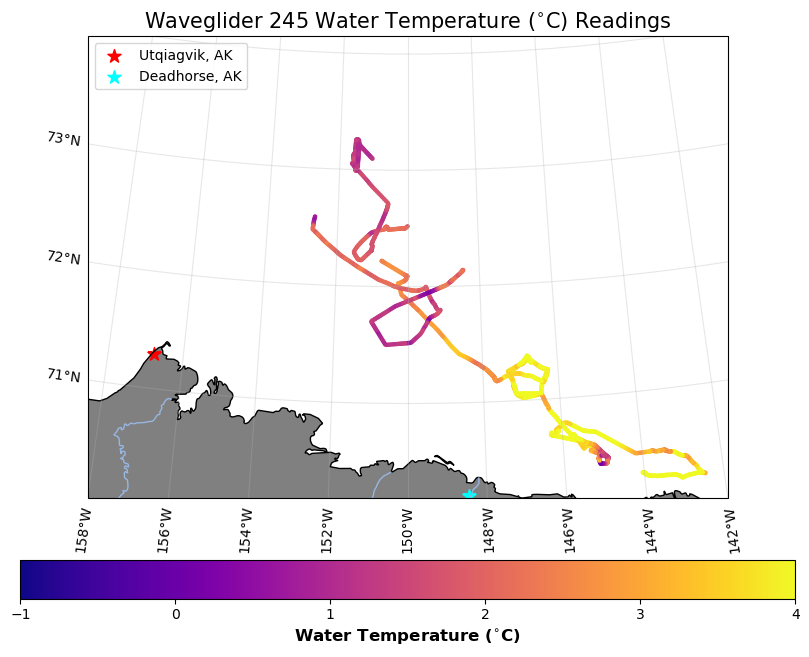

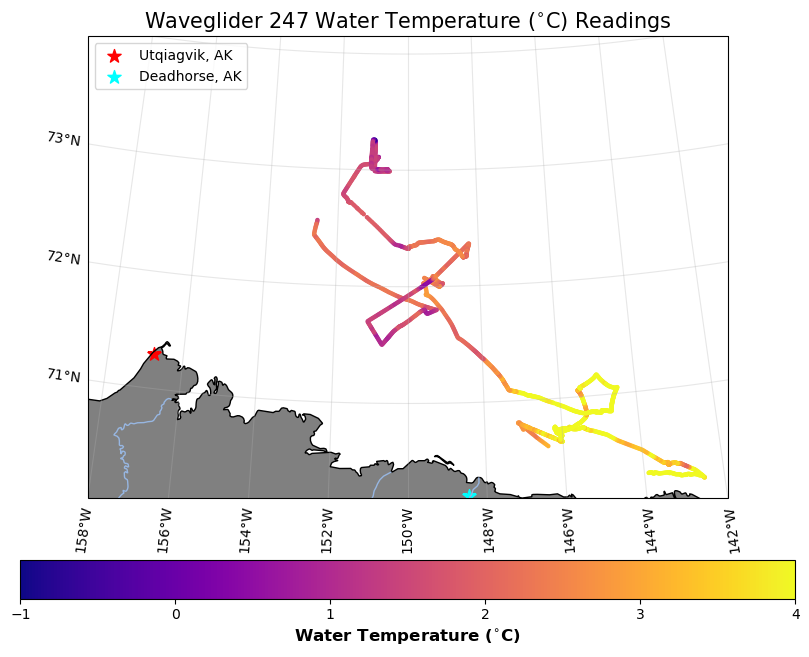

In [61]:
map_waveglider_variable(130,'water_temperature',-1,4)
map_waveglider_variable(153,'water_temperature',-1,4)
map_waveglider_variable(245,'water_temperature',-1,4)
map_waveglider_variable(247,'water_temperature',-1,4)

Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/air_temperature/Waveglider130.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/air_temperature/Waveglider153.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/air_temperature/Waveglider245.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/air_temperature/Waveglider247.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


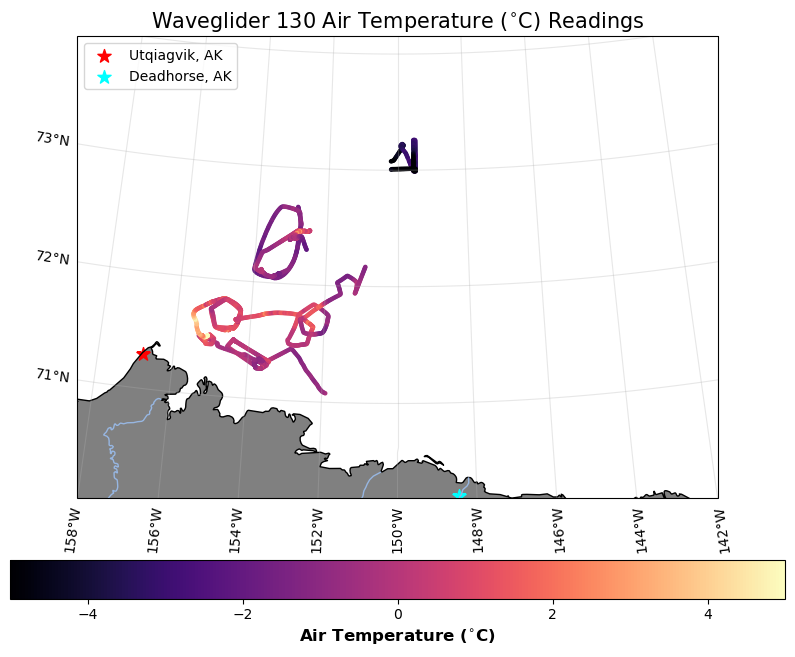

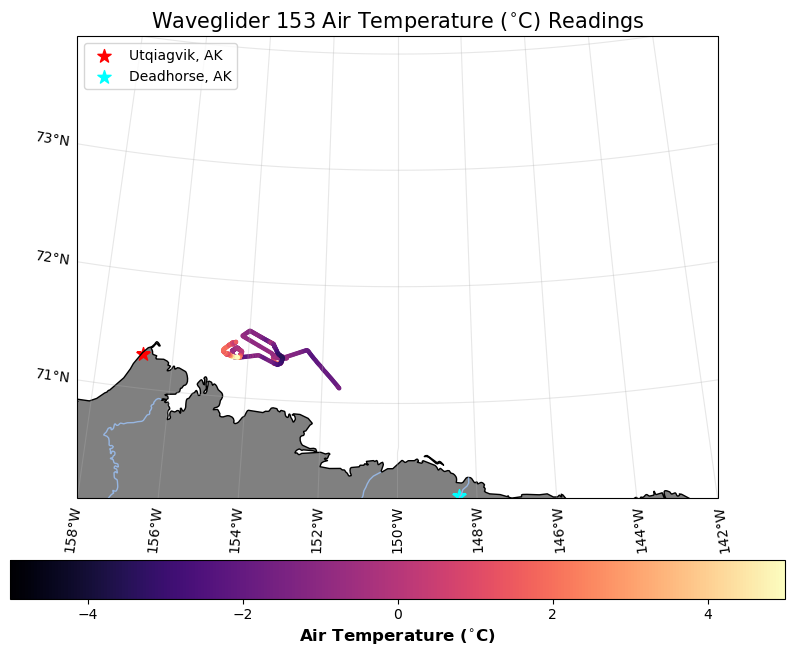

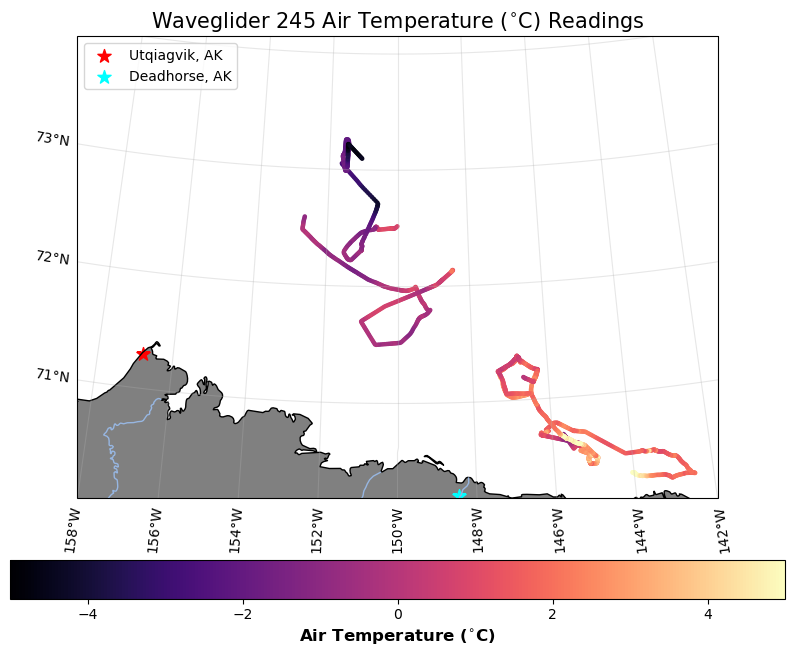

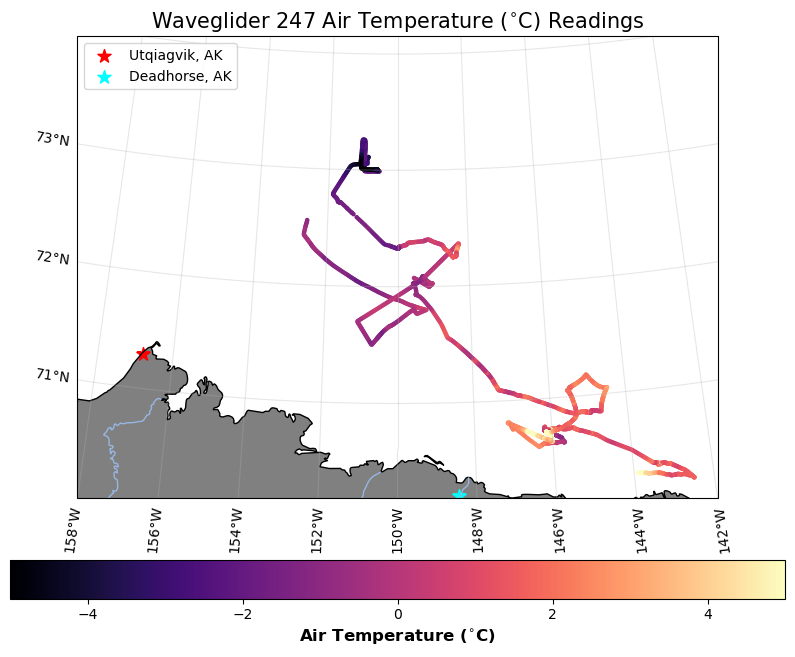

In [62]:
map_waveglider_variable(130,'air_temperature',-5,5)
map_waveglider_variable(153,'air_temperature',-5,5)
map_waveglider_variable(245,'air_temperature',-5,5)
map_waveglider_variable(247,'air_temperature',-5,5)

In [63]:
def plot_waveglider_timeseries(wg_number,var1,var2,var3): 
    
    #SECLECT AND LOAD WAVEGLIDER DATA
    file = dir_in+'SASSIE_Fall_2022_Waveglider_'+str(wg_number)+'.nc'
    ds = xr.open_dataset(file)
    time_data = ds['time']
    [colormap,var1_label] = define_var_attributes(var1)
    [colormap,var2_label] = define_var_attributes(var2)
    [colormap,var3_label] = define_var_attributes(var3)
    var1_data = ds[var1]
    var2_data = ds[var2]
    var3_data = ds[var3]
        
    #MAKE A THREE PANELED TIME SERIES PLOT
    
    fig,axs = plt.subplots(3,sharex=True)
    
    axs[0].plot(time_data,var1_data,c='black',linewidth=0.4)
    axs[0].set(ylabel=var1_label)
    axs[1].plot(time_data,var2_data,c='black',linewidth=0.4)
    axs[1].set(ylabel=var2_label)
    axs[2].plot(time_data,var3_data,c='black',linewidth=0.4)
    axs[2].set(ylabel=var3_label,xlabel = 'Date')
    
    plt.xticks(pd.date_range(start=time_data.values[0],end=time_data.values[-1],periods=3))
    fig.suptitle(var1_label+', '+var2_label+', and '+var3_label+' Data from Waveglider '+str(wg_number),fontsize=10)
        
    ##SAVE FIGURE 
    if not os.path.exists(fig_dir+'/timeseries'):
        os.makedirs(fig_dir+'/timeseries')
    print('Saving Output Image:  '+fig_dir+'timeseries/Waveglider'+str(wg_number)+'_'+var1+'_'+var2+'_'+var3+'.png')
    plt.savefig(fig_dir+'timeseries/Waveglider'+str(wg_number)+'_'+var1+'_'+var2+'_'+var3+'.png',dpi='figure',format='png')
    

Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/wavegliders/timeseries/Waveglider245_water_temperature_salinity_wind_speed.png


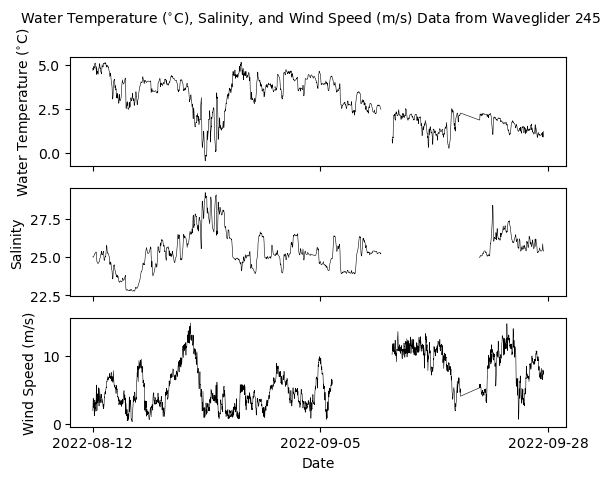

In [64]:
plot_waveglider_timeseries(245,'water_temperature','salinity','wind_speed')